## RFM(Recency, Frequency, Monetary)

* RFM은 가치있는 고객을 추출해내어 이를 기준으로 고객을 분류할 수 있는 매우 간단하면서도 유용하게 사용될 수 있는 방법으로 알려져 있어 마케팅에서 가장 많이 사용되고 있는 분석방법 중 하나이다. RFM은 구매 가능성이 높은 고객을 선정하기 위한 데이터 분석방법으로서, 분석과정을 통해 데이터는 의미있는 정보로 전환된다.

* RFM은 Recency, Frequency, Monetary의 약자로 고객의 가치를 다음의 세 가지 기준에 의해 계산하고 있다.

* Recency - 거래의 최근성: 고객이 얼마나 최근에 구입했는가?
* Frequency - 거래빈도: 고객이 얼마나 빈번하게 우리 상품을 구입했나?
* Monetary - 거래규모: 고객이 구입했던 총 금액은 어느 정도인가?

### RFM 모형

* Scoring 기법: RFM의 요인을 각각 5등급으로 등간격으로 분류하는 방법이다.
* 현재 개발된 RFM 모형은 크게 4가지로 분류 할 수 있다. 이 문서의 내용들은 정설이 아니며 신뢰하기 어려움을 전제로 참고해야한다.
    * 모델1. RFM 각 요소의 20% rule의 적용
    * 모델2. 비율 척도에 의한 양적인 정도의 차이에 따른 등간격의 5등급 분류
    * 모델3. 상하 20%를 제외한 등간격 척도에 의한 그룹 분류
    * 모델4. 군집 분석에 의한 각 요소 별 5개의 그룹 분류
* Data Mining 기법을 이용한 모형
* 회귀분석
* 선형 회귀 분석을 이용한 모형: 고객의 구매 최근성, 구매 빈도, 구매 금액 등 고객의 수익 기여도를 나타내는 세가지 지표들의 선형결합으로 세가지 지표들을 점수화 한다.
* 다중 회귀 분석을 이용한 모형: 각 고객의 구매 행동을 나타내는 R,F,M의 변수들을 독립변수로하고 고객의 미래 구매 행동을 예측하는 기법.
* 신경망을 적용한 모형: 로지스틱 회귀 모형을 보완하는 차원에서 연구.
* 확률적 RFM모형:Colombo와 Weina의 확률적인 RFM모형은 과거의 고객의 응답 이력으로 고객의 미래 응답을 예측하는 행동모델이다.

출처 : [RFM - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/RFM)




### 파레토 법칙

* 상위 고객의 20%가 기업 총 매출의 80%를 차지한다. 
* 80:20 법칙을 고려하면 고객 매출 데이터가 누적됨에 따라 마케팅에 데이터를 활용해 마케팅에 활용할 수 있다.
    
    
### 고객 세분화

* 상품과 서비스 판매정보 - 상품판매 자료 거래 금액, 횟수
* 인구통계학적 정보 - 나이, 성별, 직업, 학력, 거주지역, 소득수준
* 라이프 스타일 정보 - 순차적, 구매 정보, RFM 정보
* 심리 정보 - 구매욕구
* 행동 정보 - 구매패턴 Life Time Value
    
    
### RFM 관련 논문

[국회도서관 소장자료 -RFM을 적용한 고객 세분화 개선 및 우수고객 예측 모형에 관한 연구](http://dl.nanet.go.kr/law/SearchDetailView.do?cn=KDMT1200458026#none)

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [28]:
raw = pd.read_csv("data/online_retail.csv")

In [29]:
raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [30]:
print(raw.shape)
raw_valid = raw[(raw["Quantity"] > 0) & (raw["UnitPrice"] > 0) & (raw["CustomerID"].notnull())]
print(raw_valid.shape)
raw_valid.head(3)

(541909, 8)
(397884, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [31]:
raw_valid["TotalPrice"] = raw_valid["Quantity"] * raw_valid["UnitPrice"]
raw_valid["TotalPrice"].describe()

/opt/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count    397884.000000
mean         22.397000
std         309.071041
min           0.001000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: TotalPrice, dtype: float64

In [32]:
raw_valid["TotalPrice"] = raw_valid["TotalPrice"].clip(lower=0, upper=160000).copy()

/opt/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## 중복 데이터 확인
* 중복 데이터는 여러 이유로 발생할 수 있습니다. 네트워크 통신 문제나 쇼핑몰의 UI 구성 등의 다양한 이슈로 발생할 수 있습니다.
* 예를 들면 주문을 하고 새로고침을 했을 때 다시 주문 트랜잭션에 들어가거나 하는 이슈가 발생할 가능성도 있습니다.

In [33]:
df = raw_valid.drop_duplicates().copy()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


## RFM 계산
### 전체 주문에서 최근 주문일 구하기

In [34]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
last_timestamp = df['InvoiceDate'].max() + dt.timedelta(days=1)
last_timestamp

Timestamp('2011-12-10 12:50:00')

In [41]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


### 고객별 Recency, Frequency, Monetary 값 구하기

In [63]:
RFM = df.groupby("CustomerID").agg(
    {"InvoiceDate": lambda x: (last_timestamp - x.max()).days,
    "InvoiceNo": "count",
    "TotalPrice": "sum"}
)
RFM.columns = ["Recency", "Frequency", "Monetary"]
RFM

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


## RFM 모형

* Scoring 기법: RFM의 요인을 각각 5등급으로 등간격으로 분류하는 방법이다.
* 현재 개발된 RFM 모형은 크게 4가지로 분류 할 수 있다. 이 문서의 내용들은 정설이 아니며 신뢰하기 어려움을 전제로 참고해야한다.
    * 모델1. RFM 각 요소의 20% rule의 적용
    * 모델2. 비율 척도에 의한 양적인 정도의 차이에 따른 등간격의 5등급 분류
    * 모델3. 상하 20%를 제외한 등간격 척도에 의한 그룹 분류
    * 모델4. 군집 분석에 의한 각 요소 별 5개의 그룹 분류
    
출처 : [RFM - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/RFM)

In [64]:
r_labels = list(range(5,0,-1))
f_labels = list(range(1,6))
m_labels = list(range(1,6))
cut_size = 5

<AxesSubplot:>

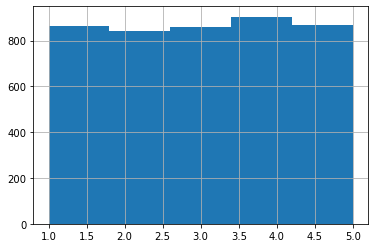

In [65]:
r_cut = pd.qcut(RFM["Recency"], q=cut_size, labels=r_labels)
f_cut = pd.qcut(RFM["Frequency"], q=cut_size, labels=f_labels)
m_cut = pd.qcut(RFM["Monetary"], q=cut_size, labels=m_labels)

r_cut.hist(bins=cut_size)

In [66]:
RFM = RFM.assign(R=r_cut, F=f_cut, M=m_cut)
RFM

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,5
12347.0,2,182,4310.00,5,5,5
12348.0,75,31,1797.24,2,3,4
12349.0,19,73,1757.55,4,4,4
12350.0,310,17,334.40,1,2,2
...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1
18281.0,181,7,80.82,1,1,1
18282.0,8,12,178.05,5,1,1


### RFM Segment

In [70]:
RFM["RFM_segment"] = RFM["R"].astype(str) + RFM["F"].astype(str) + RFM["M"].astype(str)
RFM["RFM_score"] = RFM["R"].astype(int) + RFM["F"].astype(int) + RFM["M"].astype(int)
RFM

,Recency,Frequency,Monetary,R,F,M,RFM_segment,RFM_score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7
12347.0,2,182,4310.00,5,5,5,555,15
12348.0,75,31,1797.24,2,3,4,234,9
12349.0,19,73,1757.55,4,4,4,444,12
12350.0,310,17,334.40,1,2,2,122,5
...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3
18281.0,181,7,80.82,1,1,1,111,3
18282.0,8,12,178.05,5,1,1,511,7


### RFM Score

<AxesSubplot:xlabel='RFM_segment', ylabel='RFM_score'>

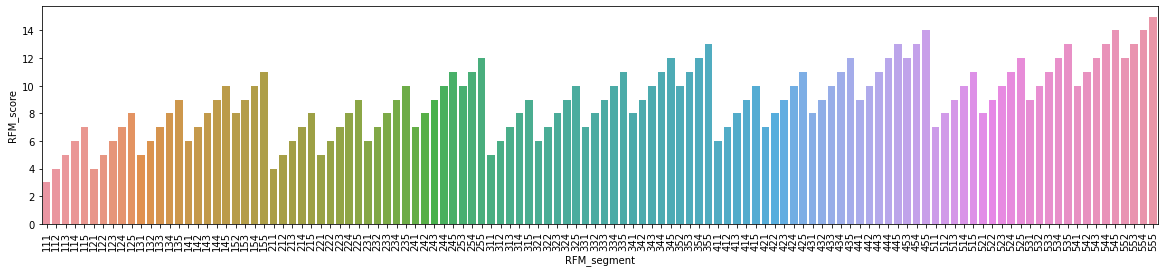

In [72]:
plt.figure(figsize=(20, 4))
plt.xticks(rotation=90)
sns.barplot(x="RFM_segment", y="RFM_score", data=RFM.sort_values(by="RFM_segment"))

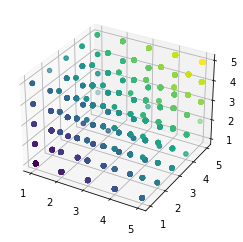

In [74]:
ax = plt.axes(projection='3d')
ax.scatter3D(RFM["R"], RFM["F"], RFM["M"], c=RFM["RFM_score"])

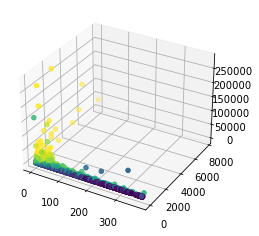

In [75]:
ax = plt.axes(projection='3d')
ax.scatter3D(RFM["Recency"], RFM["Frequency"], RFM["Monetary"], c=RFM["RFM_score"])

In [81]:
RFM.groupby("RFM_score").agg({"Recency": "mean", "Frequency": "mean", "Monetary": ["mean", "sum"]}).style.background_gradient().format("{:,.0f}")

In [113]:
RFM["RFM_class"] = pd.qcut(RFM["RFM_score"], q=3, labels=["silver", "gold", "platinum"])
RFM

,Recency,Frequency,Monetary,R,F,M,RFM_segment,RFM_score,RFM_class
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7,silver
12347.0,2,182,4310.00,5,5,5,555,15,platinum
12348.0,75,31,1797.24,2,3,4,234,9,gold
12349.0,19,73,1757.55,4,4,4,444,12,platinum
12350.0,310,17,334.40,1,2,2,122,5,silver
...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3,silver
18281.0,181,7,80.82,1,1,1,111,3,silver
18282.0,8,12,178.05,5,1,1,511,7,silver


In [114]:
RFM.groupby("RFM_class")["RFM_score"].describe()

,count,mean,std,min,25%,50%,75%,max
RFM_class,,,,,,,,
silver,1667.0,5.209358,1.383303,3.0,4.0,5.0,6.0,7.0
gold,1410.0,9.465957,1.115370,8.0,8.0,9.0,10.0,11.0
platinum,1261.0,13.462331,1.125273,12.0,12.0,13.0,14.0,15.0


<AxesSubplot:xlabel='RFM_class', ylabel='RFM_score'>

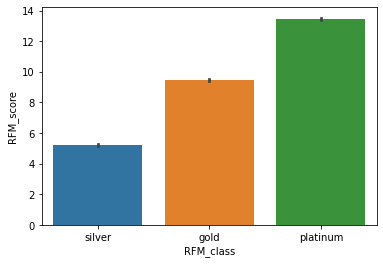

In [115]:
sns.barplot(data=RFM, x="RFM_class", y="RFM_score")

<AxesSubplot:xlabel='RFM_class', ylabel='RFM_score'>

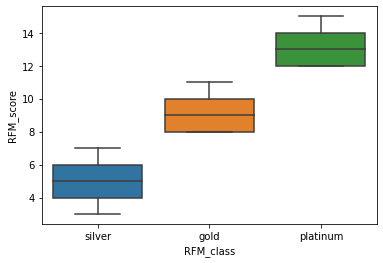

In [116]:
sns.boxplot(data=RFM, x="RFM_class", y="RFM_score")

<AxesSubplot:xlabel='R', ylabel='RFM_score'>

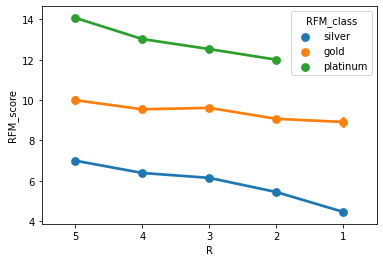

In [117]:
sns.pointplot(data=RFM, x="R", y="RFM_score", hue="RFM_class")

<AxesSubplot:xlabel='F', ylabel='RFM_score'>

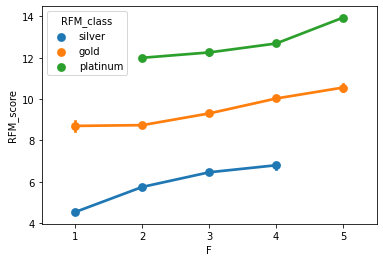

In [118]:
sns.pointplot(data=RFM, x="F", y="RFM_score", hue="RFM_class")

<AxesSubplot:xlabel='M', ylabel='RFM_score'>

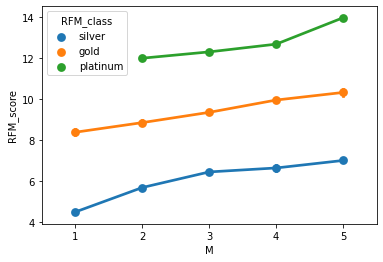

In [119]:
sns.pointplot(data=RFM, x="M", y="RFM_score", hue="RFM_class")

In [120]:
RFM.groupby("RFM_class").agg(
    {"Recency": "mean", 
    "Frequency": "mean", 
    "Monetary": ["mean", "sum", "count"]}
).style.background_gradient().format("{:,.0f}")

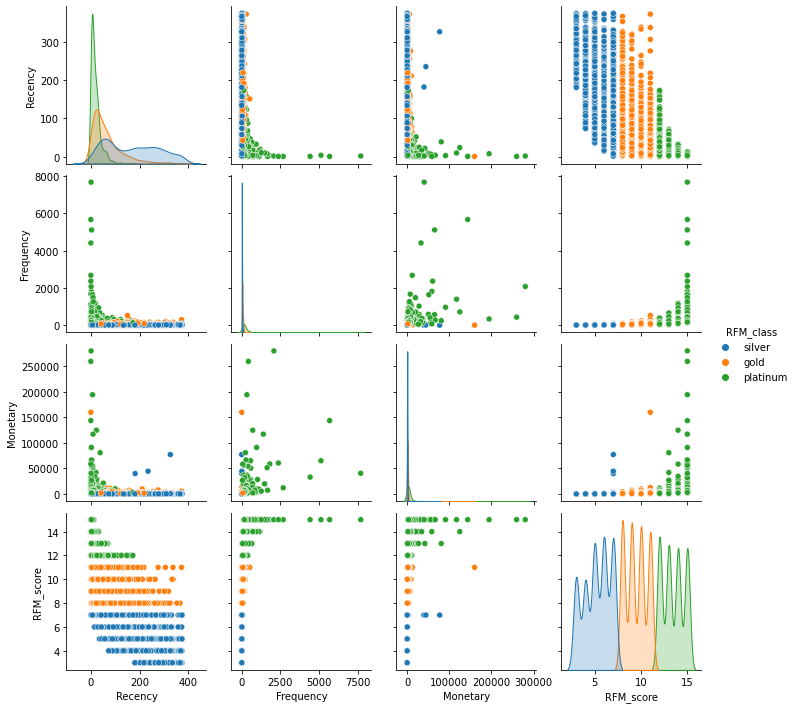

In [121]:
sns.pairplot(data=RFM, hue="RFM_class")

In [122]:
RFM.corr()

,Recency,Frequency,Monetary,RFM_score
Recency,1.000000,-0.206444,-0.122112,-0.700325
Frequency,-0.206444,1.000000,0.427045,0.404376
Monetary,-0.122112,0.427045,1.000000,0.243761
RFM_score,-0.700325,0.404376,0.243761,1.000000


<AxesSubplot:>

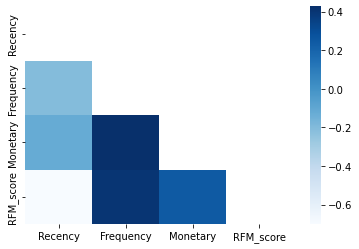

In [123]:
mask = (np.triu(RFM.corr()))
sns.heatmap(RFM.corr(), mask=mask, cmap="Blues")

In [132]:
RFM.to_csv("./data/RFM.csv")

In [133]:
pd.read_csv("./data/RFM.csv")

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_segment,RFM_score,RFM_class
0,12346.0,326,1,77183.60,1,1,5,115,7,silver
1,12347.0,2,182,4310.00,5,5,5,555,15,platinum
2,12348.0,75,31,1797.24,2,3,4,234,9,gold
3,12349.0,19,73,1757.55,4,4,4,444,12,platinum
4,12350.0,310,17,334.40,1,2,2,122,5,silver
...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,278,10,180.60,1,1,1,111,3,silver
4334,18281.0,181,7,80.82,1,1,1,111,3,silver
4335,18282.0,8,12,178.05,5,1,1,511,7,silver
4336,18283.0,4,721,2045.53,5,5,4,554,14,platinum
